## Assignment 7 (Clustering)

# Q.1

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

#### Crime dataset

In [15]:
data=pd.read_csv(r"C:\Users\rajes\Downloads\crime_data (1).csv")

In [16]:
data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
data.shape

(50, 5)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [19]:
data.isnull().sum()

city        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [20]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Visualization

<AxesSubplot:xlabel='Murder', ylabel='Density'>

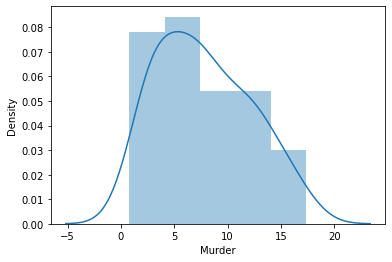

In [21]:
sns.distplot(data['Murder'])

<AxesSubplot:xlabel='Assault', ylabel='Density'>

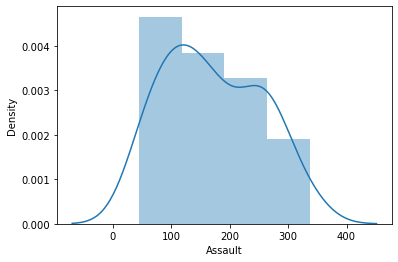

In [22]:
sns.distplot(data['Assault'])

<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

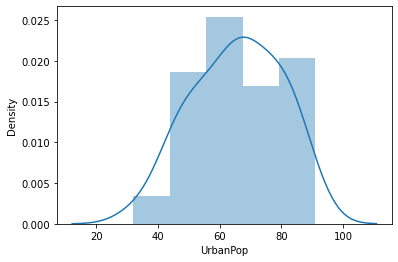

In [23]:
sns.distplot(data['UrbanPop'])

<AxesSubplot:xlabel='Rape', ylabel='Density'>

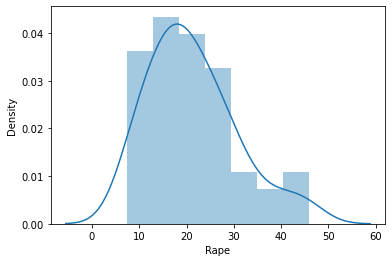

In [24]:
sns.distplot(data['Rape'])

#### Scatter plot city and their murder, Assault,urbanpop and rape rate

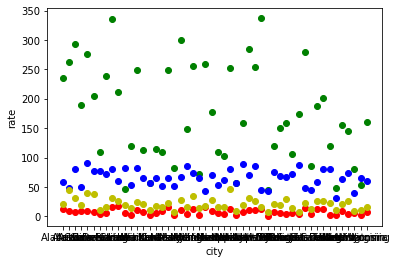

In [25]:
plt.scatter(data.city, data.Murder, color='r')
plt.scatter(data.city, data.Assault, color='g')
plt.scatter(data.city, data.UrbanPop, color='b')
plt.scatter(data.city, data.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [26]:
data.loc[:,'Total']=data.sum(numeric_only=True,axis=1)


In [27]:
data.head()

,city,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


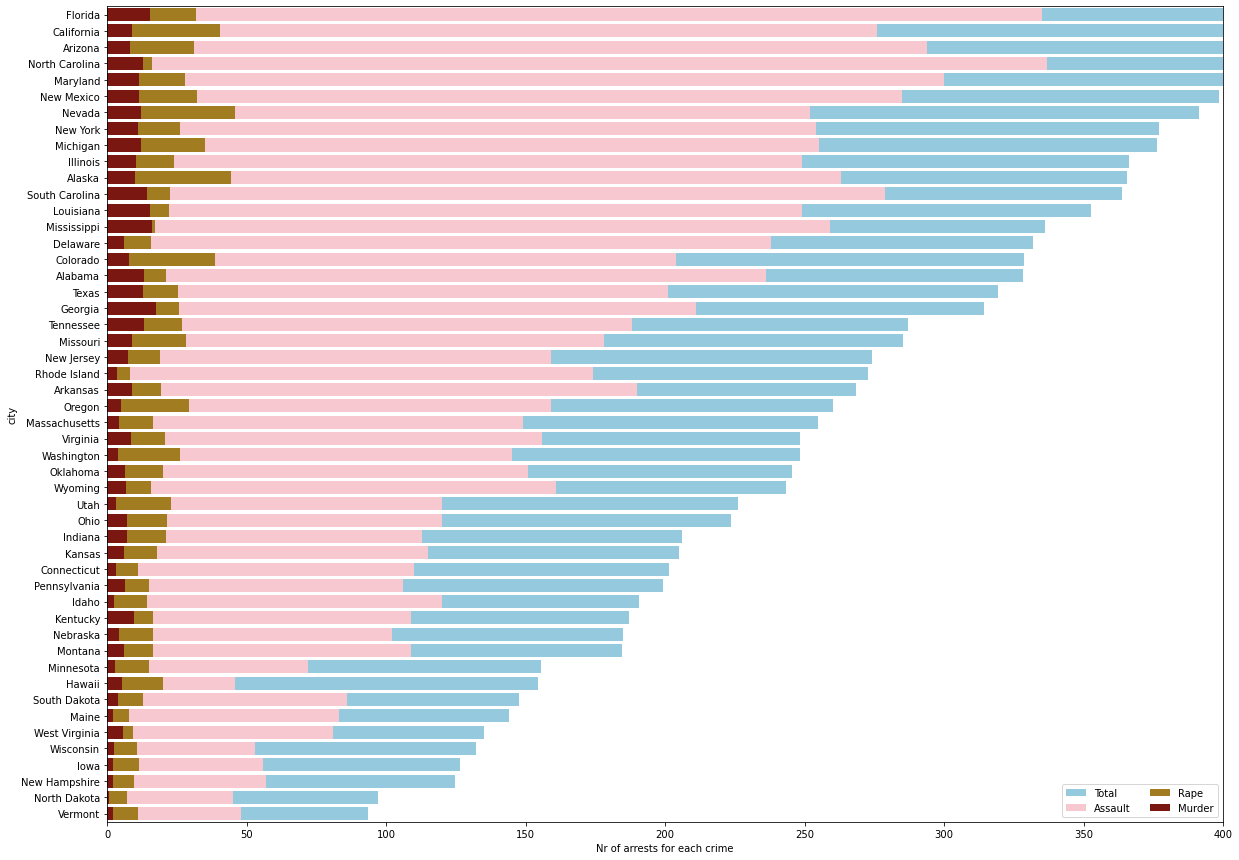

In [28]:
f, ax = plt.subplots(figsize=(20, 15))

stats = data.sort_values("Total", ascending=False)

sns.set_color_codes("dark")

sns.barplot(x="Total", y="city", data=stats,
            label="Total", color="skyblue")

sns.barplot(x="Assault", y="city", data=stats,
            label="Assault", color="pink")

sns.barplot(x="Rape", y="city", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="city", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="city",
       xlabel="Nr of arrests for each crime");

Normlize the data

In [29]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape,Total
0,0.746988,0.654110,0.440678,0.359173,0.637029
1,0.554217,0.746575,0.271186,0.961240,0.737598
2,0.439759,0.852740,0.813559,0.612403,0.866631
3,0.481928,0.496575,0.305085,0.315245,0.474112
4,0.493976,0.791096,1.000000,0.860465,0.876118
5,0.427711,0.544521,0.779661,0.811370,0.637571
6,0.150602,0.222603,0.762712,0.098191,0.292762
7,0.307229,0.660959,0.677966,0.219638,0.645975
8,0.879518,0.993151,0.813559,0.635659,1.000000
9,1.000000,0.568493,0.474576,0.478036,0.598536


### Hierarchical Clustering

Creating Dendogram

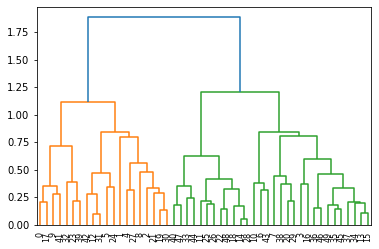

In [31]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

Creating Clusters

In [32]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [33]:
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [34]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [35]:
data['Clusters']=Clusters
data

,city,Murder,Assault,UrbanPop,Rape,Total,Clusters
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,0
2,Arizona,8.1,294,80,31.0,413.1,0
3,Arkansas,8.8,190,50,19.5,268.3,1
4,California,9.0,276,91,40.6,416.6,0
5,Colorado,7.9,204,78,38.7,328.6,0
6,Connecticut,3.3,110,77,11.1,201.4,1
7,Delaware,5.9,238,72,15.8,331.7,1
8,Florida,15.4,335,80,31.9,462.3,0
9,Georgia,17.4,211,60,25.8,314.2,0


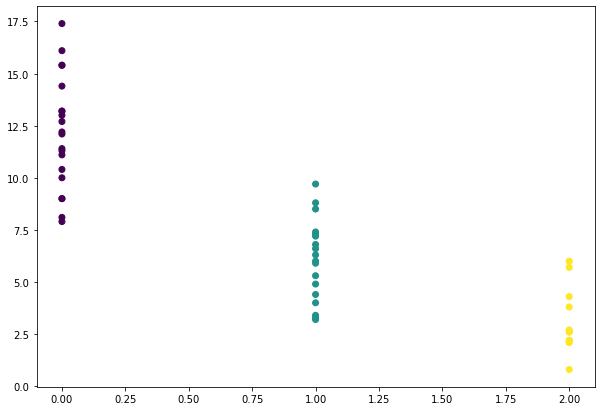

In [36]:
plt.figure(figsize=(10,7))  
plt.scatter(data['Clusters'],data['Murder'], c=y_hc)

In [37]:
data[data['Clusters']==0]

,city,Murder,Assault,UrbanPop,Rape,Total,Clusters
0,Alabama,13.2,236,58,21.2,328.4,0
1,Alaska,10.0,263,48,44.5,365.5,0
2,Arizona,8.1,294,80,31.0,413.1,0
4,California,9.0,276,91,40.6,416.6,0
5,Colorado,7.9,204,78,38.7,328.6,0
8,Florida,15.4,335,80,31.9,462.3,0
9,Georgia,17.4,211,60,25.8,314.2,0
12,Illinois,10.4,249,83,24.0,366.4,0
17,Louisiana,15.4,249,66,22.2,352.6,0
19,Maryland,11.3,300,67,27.8,406.1,0


In [38]:
data[data['Clusters']==1]

,city,Murder,Assault,UrbanPop,Rape,Total,Clusters
3,Arkansas,8.8,190,50,19.5,268.3,1
6,Connecticut,3.3,110,77,11.1,201.4,1
7,Delaware,5.9,238,72,15.8,331.7,1
10,Hawaii,5.3,46,83,20.2,154.5,1
13,Indiana,7.2,113,65,21.0,206.2,1
15,Kansas,6.0,115,66,18.0,205.0,1
16,Kentucky,9.7,109,52,16.3,187.0,1
20,Massachusetts,4.4,149,85,16.3,254.7,1
29,New Jersey,7.4,159,89,18.8,274.2,1
34,Ohio,7.3,120,75,21.4,223.7,1


In [39]:
data[data['Clusters']==2]

,city,Murder,Assault,UrbanPop,Rape,Total,Clusters
11,Idaho,2.6,120,54,14.2,190.8,2
14,Iowa,2.2,56,57,11.3,126.5,2
18,Maine,2.1,83,51,7.8,143.9,2
22,Minnesota,2.7,72,66,14.9,155.6,2
25,Montana,6.0,109,53,16.4,184.4,2
26,Nebraska,4.3,102,62,16.5,184.8,2
28,New Hampshire,2.1,57,56,9.5,124.6,2
33,North Dakota,0.8,45,44,7.3,97.1,2
40,South Dakota,3.8,86,45,12.8,147.6,2
44,Vermont,2.2,48,32,11.2,93.4,2


### KMeans Clustering

In [41]:
data1=pd.read_csv(r"C:\Users\rajes\Downloads\crime_data (1).csv")

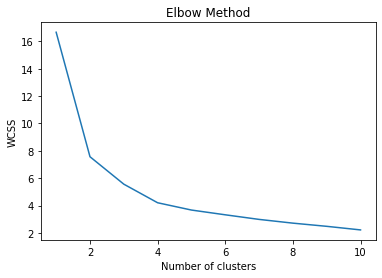

In [42]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The scree plot levels off at k=4 and let's use it to determine the clusters

In [43]:
model=KMeans(n_clusters=4)       #selecting 4 clusters from above plot
model.fit(df_norm)

KMeans(n_clusters=4)

In [44]:
model.labels_

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 0, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [45]:
model.cluster_centers_

array([[0.31166772, 0.31651045, 0.67618198, 0.30300558, 0.38198913],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189, 0.79066143],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408, 0.64875305],
       [0.13143483, 0.09806974, 0.32511556, 0.10617806, 0.12417753]])

In [46]:
data1['clusterid_new'] = model.labels_          #Assign clusters to the data set
data1

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [47]:
data1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.973684,137.421053,71.894737,19.026316
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,2.981818,73.636364,51.181818,11.409091


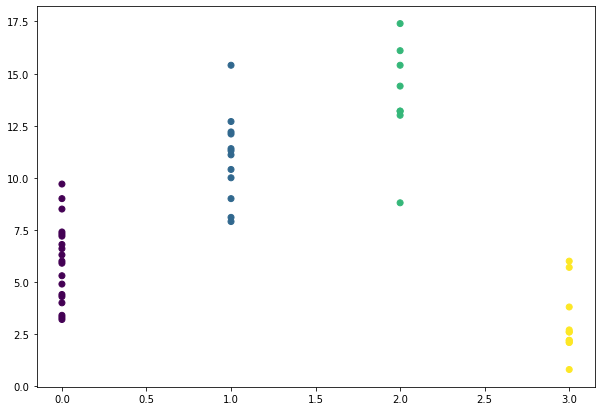

In [48]:
plt.figure(figsize=(10,7))  
plt.scatter(data1['clusterid_new'],data1['Murder'], c=model.labels_)

In [49]:
data1[data1['clusterid_new']==0]

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
26,Nebraska,4.3,102,62,16.5,0
29,New Jersey,7.4,159,89,18.8,0


In [50]:
data1[data1['clusterid_new']==1]

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [51]:
data1[data1['clusterid_new']==2]

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [52]:
data1[data1['clusterid_new']==3]

,city,Murder,Assault,UrbanPop,Rape,clusterid_new
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3
47,West Virginia,5.7,81,39,9.3,3


## DBSCAN Clustering

In [55]:
data2=pd.read_csv(r"C:\Users\rajes\Downloads\crime_data (1).csv")
data2

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [56]:
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(data2.iloc[:,1:])
scaled_crime_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [57]:
dbs=DBSCAN(min_samples=5,eps=2)

In [58]:
dbs.fit(scaled_crime_data)

DBSCAN(eps=2)

In [59]:
dbs.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [60]:
Cluster=pd.DataFrame(dbs.labels_,columns=['Clust'])
Cluster

,Clust
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [61]:
data2['Cluster']=Cluster
data2

,city,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


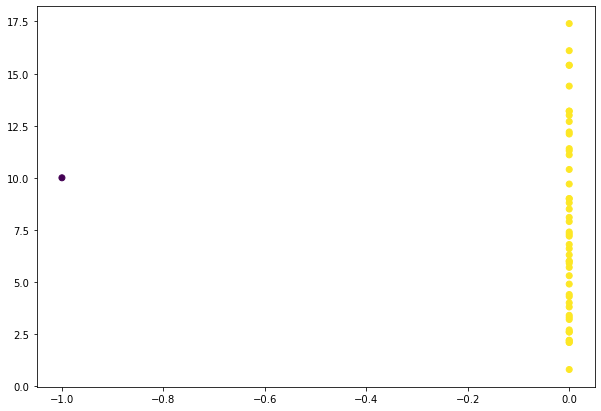

In [62]:
plt.figure(figsize=(10,7))  
plt.scatter(data2['Cluster'],data2['Murder'], c=dbs.labels_)

In [63]:
data2[data2['Cluster']==-1]

,city,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,-1


In [64]:
#It is an outlier

# Q.2

In [74]:
Air_data=pd.read_excel(r"\Users\Dell\Downloads\EastWestAirlines.xlsx")

In [75]:
Air_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [76]:
Air_data.shape

(3999, 12)

In [77]:
Air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [78]:
Air_data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [79]:
Air_data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:xlabel='Balance', ylabel='Density'>

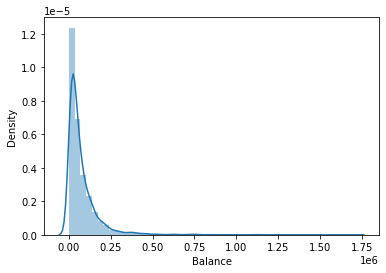

In [80]:
sns.distplot(Air_data['Balance'])

<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

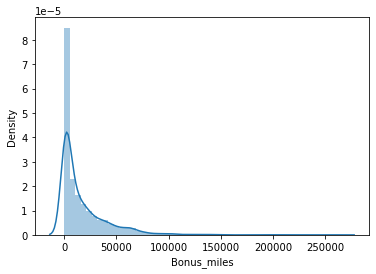

In [81]:
sns.distplot(Air_data['Bonus_miles'])

In [82]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [83]:
df1_norm = norm_func(Air_data.iloc[:,1:])
df1_norm


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Hierarchical Clustering

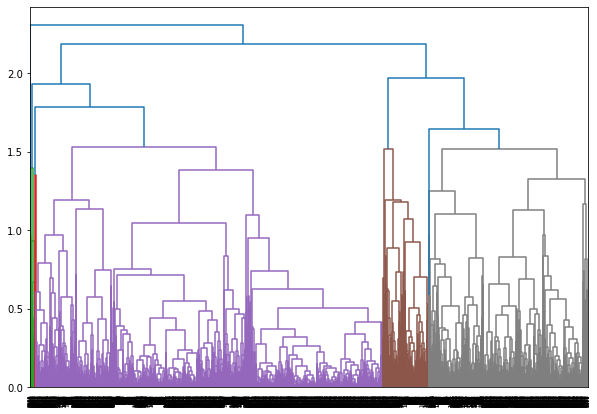

In [84]:
#Creating Dendogram
plt.figure(figsize=(10,7))  
dendrogram = sch.dendrogram(sch.linkage(df1_norm, method='complete'))


In [85]:
#Creating Clusters
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc1

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [86]:
y_hc1 = hc1.fit_predict(df1_norm)
y_hc1

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [87]:
Clusters1=pd.DataFrame(y_hc1,columns=['Clusters1'])
Clusters1

,Clusters1
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,2
3997,0


In [88]:
Air_data['Clusters1']=Clusters1
Air_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


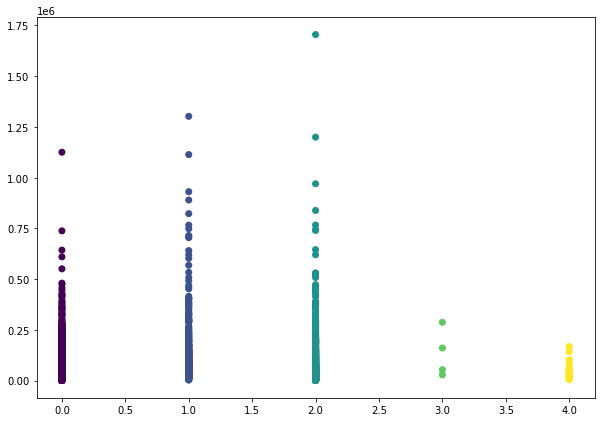

In [89]:
plt.figure(figsize=(10,7))  
plt.scatter(Air_data['Clusters1'],Air_data['Balance'], c=y_hc1)

## KMeans Clustering

In [91]:
air_data=pd.read_excel(r"\Users\rajes\Downloads\EastWestAirlines (1).xlsx")

In [92]:
air1_data=air_data.drop(['ID#'],axis=1)
air1_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [93]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [94]:
df2_norm = norm_func(air1_data)
df2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


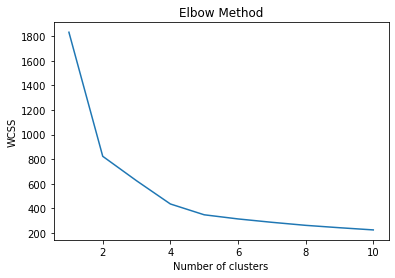

In [95]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
# selecting 4 clusters from above plot
model1=KMeans(n_clusters=4)
model1.fit(df2_norm)

KMeans(n_clusters=4)

In [97]:
model1.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [98]:
#Assign clusters to the data set
air1_data['clusterid_new'] = model1.labels_
air1_data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [99]:
model1.cluster_centers_

array([[ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01, -5.55111512e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -3.33066907e-16]])

In [100]:
air1_data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


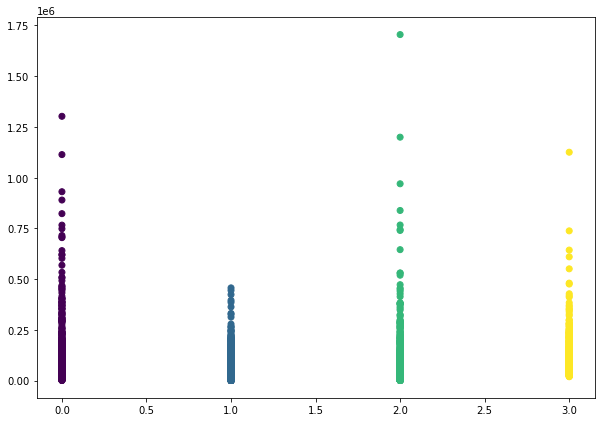

In [101]:
plt.figure(figsize=(10,7))  
plt.scatter(air1_data['clusterid_new'],air1_data['Balance'], c=model1.labels_)

## DBSCAN Clustering

In [102]:
air=pd.read_excel(r"\Users\rajes\Downloads\EastWestAirlines (1).xlsx")

In [103]:
scaler = StandardScaler()
scaled_airlines_data = scaler.fit_transform(air.iloc[:,1:])
scaled_airlines_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [104]:
dbs1=DBSCAN(min_samples=5,eps=2)

In [105]:
dbs1.fit(scaled_airlines_data)

DBSCAN(eps=2)

In [106]:
dbs1.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [107]:
Cluster=pd.DataFrame(dbs1.labels_,columns=['Clust'])
Cluster

,Clust
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [108]:
air['Cluster']=Cluster
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


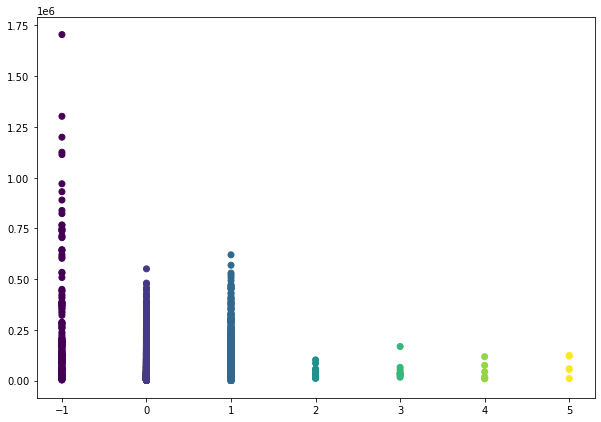

In [109]:
plt.figure(figsize=(10,7))  
plt.scatter(air['Cluster'],air['Balance'], c=dbs1.labels_)